# Team JM2 Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM JM2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge
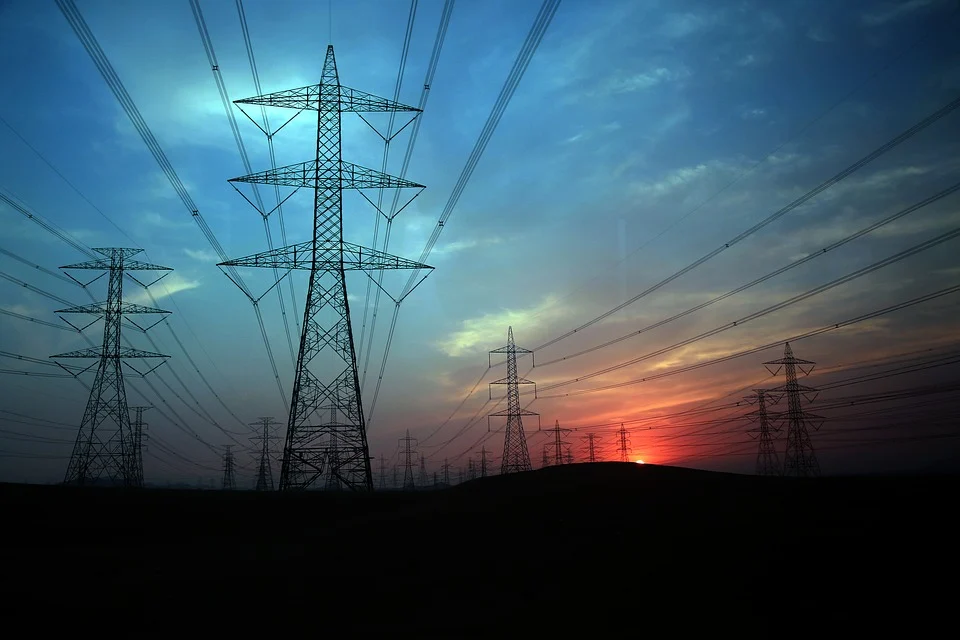

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

In [1804]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt


# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import *
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pickle
from sklearn.ensemble import ExtraTreesRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split # Import train/test split module
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are to load the data from the `df_train` file into a DataFrame. |

---

In [1805]:
df = pd.read_csv('df_train.csv')
df.head(20)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


**After loading the data, we can see the data is still raw, the data consists of 20 rows and 49 columns. There is a lot of predictor variables to work with. It is most likely that many of these predictor variables are not going to be useful to our cause. This brings us to the next data science process which is the Exploratory Data Analysis.**

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
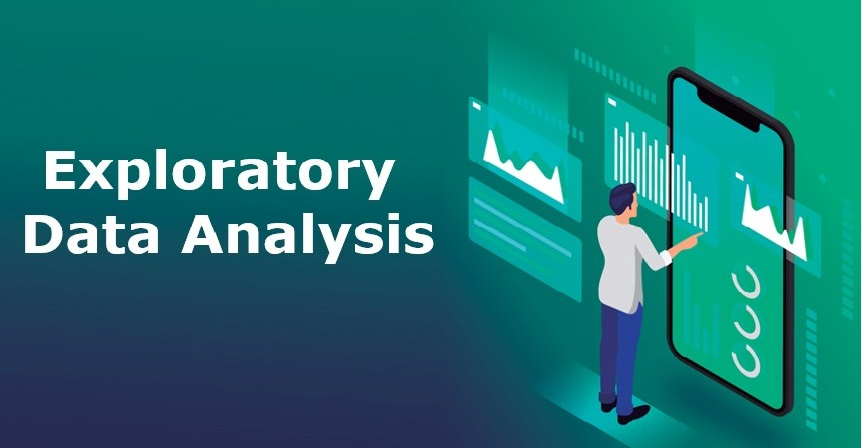
---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our predictor variables to know if they are useful in this project.

---


In [1806]:
# look at data statistics
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


From the statistics, we can clearly see the maximum, minimum and mean of all the predictor variables as well
as the target variable.

In [1807]:
# showing the columns
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

This was carried out to be able to know all our features. From the above, it can be seen there are a very 
good number of features in our dataset.

In [1808]:
#data statistics continues
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The skewness helps us see how our various features tends away from the mean. Some of these features
are not distributed normally. 

In [1809]:
#checking the kurtosis to see if there are outliers in our dataset
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

After running kurtosis, it can be seen that there are outliers in some of our features. Features such as;

Barcelona_rain_1h       
Seville_rain_1h           
Bilbao_snow_3h           
Barcelona_pressure      
Seville_rain_3h          
Madrid_rain_1h            
Barcelona_rain_3h       
Valencia_snow_3h        

 
 All these features have many outliers. Since the outliers are many in each of these features, we are going
 to drop these features later on in order to avoid them affecting the outcome.

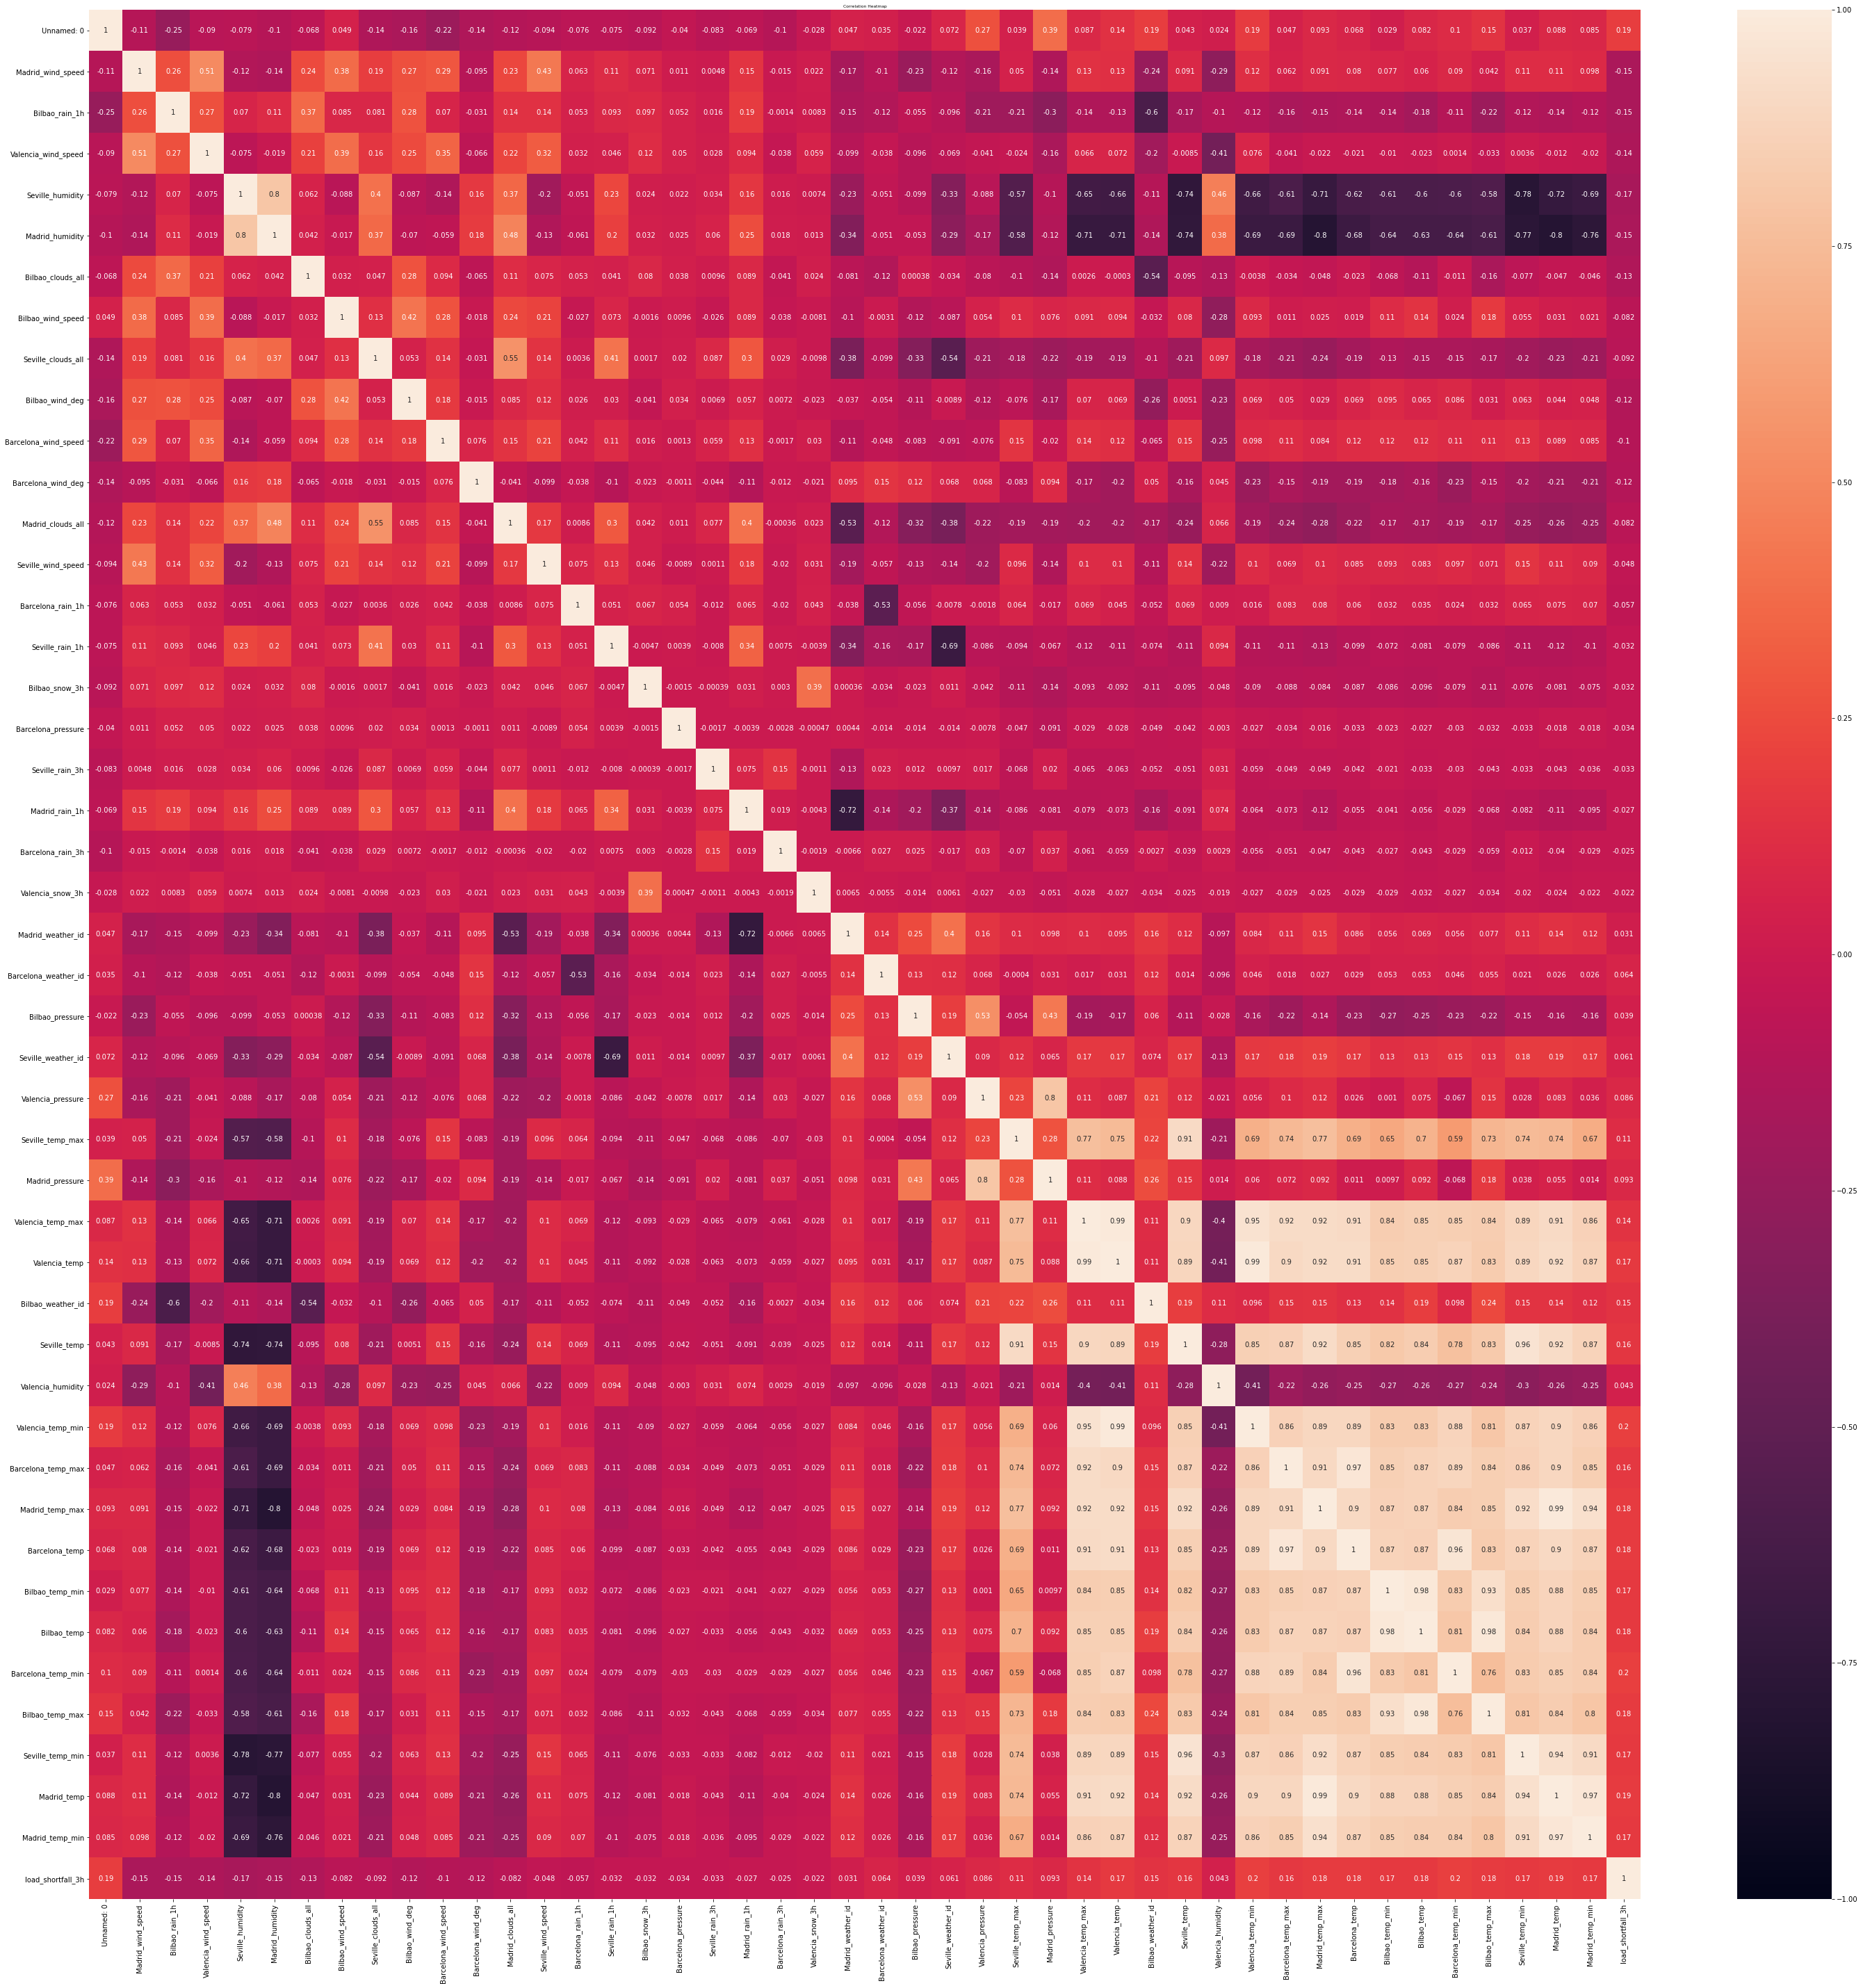

In [1810]:
# plot relevant feature interactions
##Checking for Multicollinearity
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':6}, pad=3);

From the correlation heatmap, it is obvious there is presence of multicollinearity in our dataset. If left unattended to, it can cause problem in our output. There is collinearity between the following features;

Valencia_temp & Valencia_temp_max

Valencia_temp & Valencia_temp_min

Seville_temp & Seville_temp_max

Seville_temp & Seville_temp_min

Barcelona_temp & Barcelona_temp_max

Barcelona_temp & Barcelona_temp_min

Bilbao_temp & Bilbao_temp_max

Bilbao_temp & Bilbao_temp_min

Madrid_temp & Madrid_temp_max

Madrid_temp & Madrid_temp_min

For multicollinearity not affect output, we are going to drop one feature from each multicollinearity later on. 


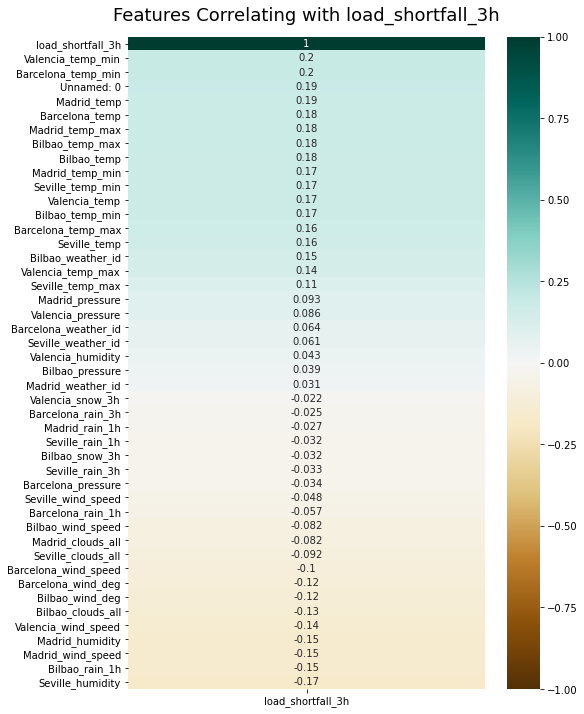

In [1811]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['load_shortfall_3h']].sort_values(by='load_shortfall_3h', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with load_shortfall_3h', fontdict={'fontsize':18}, pad=16);


After drawing the correlation between each of the predictor variables and the load_shortfall_3h target variable, we now have better knowledge of our dataset; some of these predictors are in no way correlated to our target variable, meaning, they are not going to help in predicting the target variable. Due to this, we are going to drop them later on when we join our two datasets for cleaning.

From the correlation, it can be seen that the features are weakly correlated to the target variable(load_shortfall_3h). 

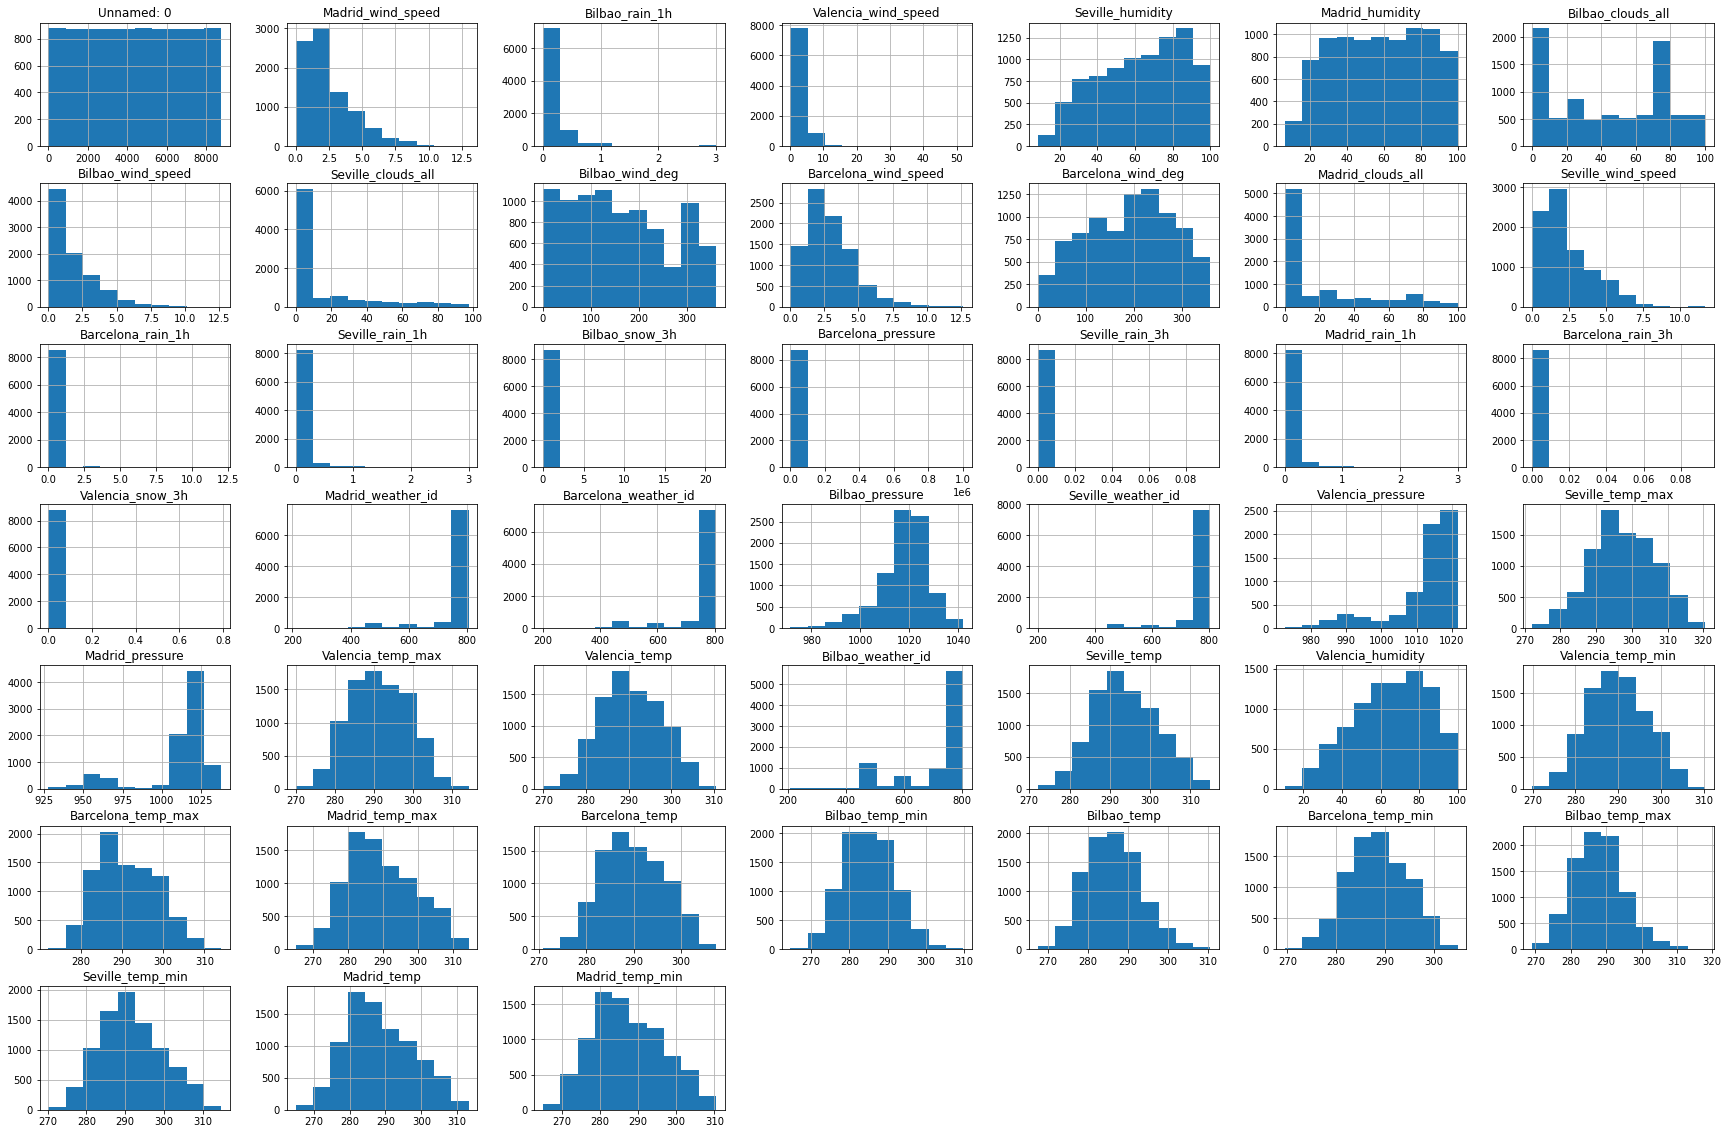

In [1812]:
# have a look at feature distributions
features = ['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min'] # create a list of all numerical features
df[features].hist(figsize=(30,20));


From the distribution plot, it is seen that some of these features are very much normally distributed. Features that are normally distributed includes:

Seville_temp

Valencia_humidity

Valencia_temp_min

Barcelona_temp_max

Madrid_temp_max

Barcelona_temp 

Bilbao_temp_min 

Bilbao_temp

Barcelona_temp_min 

Bilbao_temp_max 

Seville_temp_min

Madrid_temp

Madrid_temp_min

Valencia_temp_max

Valencia_temp

Seville_temp_max

Bilbao_pressure

Barcelona_wind_speed

Seville_humidity

Madrid_humidity

Bilbao_wind_deg

This shows these features are well distributed around their mean and also shows the lack of outliers in these features.



<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
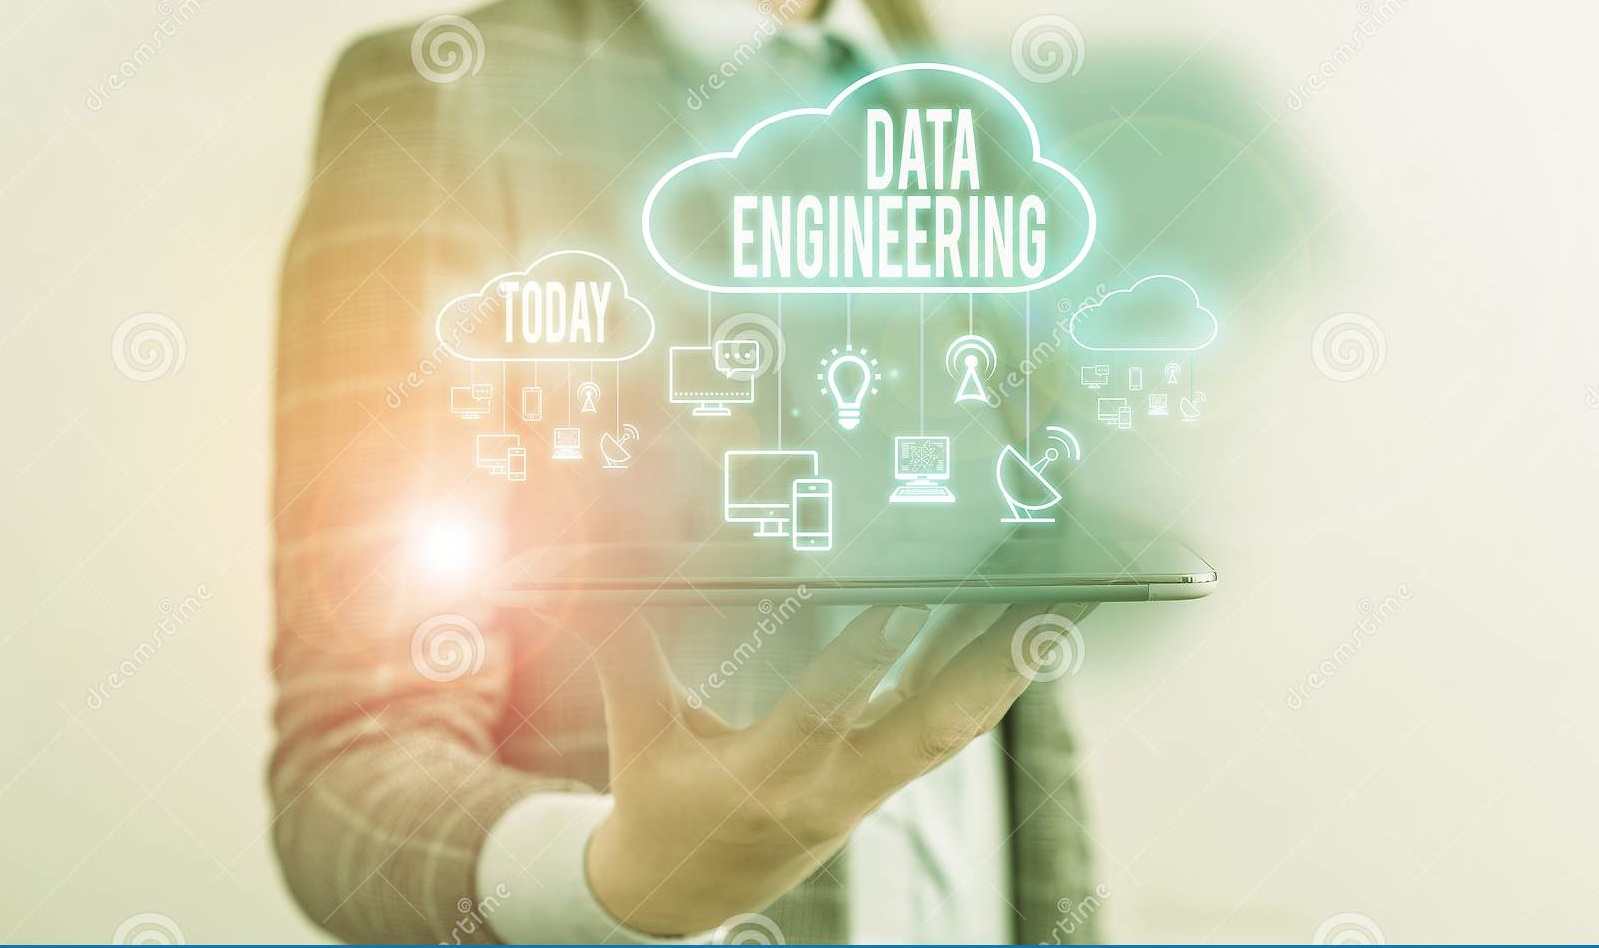
---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

In [1813]:
# load in the test data
df2 = pd.read_csv('df_test.csv')

We load the test dataset in order to clean and manipulate it alongside the train dataset. 

In [1814]:
#Dropping the features with large amount of outliers
df = df.drop(['Barcelona_rain_1h',       
'Seville_rain_1h',           
'Bilbao_snow_3h',           
'Barcelona_pressure',      
'Seville_rain_3h',          
'Madrid_rain_1h',            
'Barcelona_rain_3h',      
'Valencia_snow_3h', 'Bilbao_rain_1h'        
], axis = 1)

From the kurtosis statistics carried out earlier, we discovered there are features with outliers, we decided to
drop features with large amount of outliers so they do not affect our outcome.

In [1815]:
#Dropping the features with large amount of outliers
df2 = df2.drop(['Barcelona_rain_1h',       
'Seville_rain_1h',           
'Bilbao_snow_3h',           
'Barcelona_pressure',      
'Seville_rain_3h',          
'Madrid_rain_1h',            
'Barcelona_rain_3h',      
'Valencia_snow_3h', 'Bilbao_rain_1h'        
], axis = 1)

The same action was carried out on the test dataset in order to ensure the train and test dataset are in unison.

In [1816]:
#checking for null values
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Seville_pressure           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humidity          0
Valencia_temp_min          0
Barcelona_temp_max         0
Madrid_temp_max            0
Barcelona_temp             0
Bilbao_temp_min            0
Bilbao_temp                0
Barcelona_temp

The train dataset was checked for null or missing values. Valencia_pressure has 2068 missing values in the train dataset. This is a huge amount of dataset, but not huge enough to make us drop the feature.

In [1817]:
#checking the test dataset for null or missing values
df2.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Seville_pressure          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity         0
Valencia_temp_min         0
Barcelona_temp_max        0
Madrid_temp_max           0
Barcelona_temp            0
Bilbao_temp_min           0
Bilbao_temp               0
Barcelona_temp_min        0
Bilbao_temp_max     

The test dataset was also checked for missing values and 454 data were missing from Valencia_pressure column. Now, let us find out the percentage of data missing in this column.

In [1818]:
#checking percentage of missing values in the Valencia_pressure column for the train dataset
percent_missing = (df['Valencia_pressure'].isnull().sum()/df.shape[0])*100
percent_missing

23.59922401004222

In [1819]:
#checking percentage of missing values in the Valencia_pressure column for the test dataset
percent_missing = (df2['Valencia_pressure'].isnull().sum()/df2.shape[0])*100
percent_missing

15.547945205479452

Since the percentage of missing value in Valencia_pressure is approximately 22% in the train dataset and 16% in the test dataset, we can go ahead to replace the missing values instead of dropping the features. Therefore, we need to check the statistics for Valencia_pressure and know which metric to use in replacing the missing values.

In [1820]:
#checking statistics of the column with missing values in the train dataset
metric1 = df['Valencia_pressure'].mode()
metric2 = df['Valencia_pressure'].mean()
metric3 = df['Valencia_pressure'].median()
print("mode:", metric1)
print("mean:", metric2)
print("median", metric3)

mode: 0    1018.0
dtype: float64
mean: 1012.0514065222828
median 1015.0


In [1821]:
#checking statistics of the column with missing values in the test dataset
metric1 = df2['Valencia_pressure'].mode()
metric2 = df2['Valencia_pressure'].mean()
metric3 = df2['Valencia_pressure'].median()
print("mode:", metric1)
print("mean:", metric2)
print("median", metric3)

mode: 0    1016.0
dtype: float64
mean: 1013.1483509056495
median 1014.6666666667


From the train and test dataset, the mean, median and mode of Valencia_pressure is found, and from the output, it is seen that the three metrics are quite close. This means any of the metric we choose would have almost the same impact as the other two.

In [1822]:
# Replacing null values in the Valencia_pressure column in the train dataset
df_cln_train = df
df_cln_train['Valencia_pressure'] = df_cln_train['Valencia_pressure'].fillna(df_cln_train['Valencia_pressure'].mode()[0])

In [1823]:
# Replacing null values in the Valencia_pressure column in the test dataset
df_cln_test = df2
df_cln_test['Valencia_pressure'] = df_cln_test['Valencia_pressure'].fillna(df_cln_test['Valencia_pressure'].mode()[0])

The mode was selected as the metric to replace the missing values and it replaced the missing values. Now, we check if the missing values have been replaced.

In [1824]:
#checking null values
df_cln_train.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Seville_pressure        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_temp_min      0
Bilbao_temp_max         0
Seville_temp_min        0
Madrid_temp             0
Madrid_temp_

In [1825]:
df_cln_test.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Seville_pressure        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_temp_min      0
Bilbao_temp_max         0
Seville_temp_min        0
Madrid_temp             0
Madrid_temp_

From the two dataset, it is seen that the missing values have been replaced by their mode in the Valencia_pressure column.

In [1826]:
#checking datatype of all our features
df_cln_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Seville_pressure         object
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia_temp           float64
Bilbao_weather_id       float64
Seville_temp            float64
Valencia_humidity       float64
Valencia_temp_min       float64
Barcelona_temp_max      float64
Madrid_temp_max         float64
Barcelon

Cleaning of the datasets continues as we check the datatype of each features. We need to change all our datatype to numerical in order not to experience conflict due to the datatypes of the features later on when modelling. Features such as 'time', 'Valencia_wind_deg' and Seville_pressure are not numerical datatype, therefore, we need to convert them to numerical datatype.

In [1827]:
df_cln_train['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
8758    2017-12-31 09:00:00
8759    2017-12-31 12:00:00
8760    2017-12-31 15:00:00
8761    2017-12-31 18:00:00
8762    2017-12-31 21:00:00
Name: time, Length: 8763, dtype: object

In [1828]:
df_cln_test['time']

0       2018-01-01 00:00:00
1       2018-01-01 03:00:00
2       2018-01-01 06:00:00
3       2018-01-01 09:00:00
4       2018-01-01 12:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 2920, dtype: object

The 'time' feature on both dataset is an object datatype, we need to convert it to datetime before it can be of any use to us.

In [1829]:
df_cln_train['time'] = pd.to_datetime(df_cln_train['time'])
df_cln_train.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

In [1830]:
df_cln_test['time'] = pd.to_datetime(df_cln_test['time'])
df_cln_test.time

0      2018-01-01 00:00:00
1      2018-01-01 03:00:00
2      2018-01-01 06:00:00
3      2018-01-01 09:00:00
4      2018-01-01 12:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 2920, dtype: datetime64[ns]

The 'time' feature has been converted to datetime. Now, we can engineer the time feature to get suitable feature that can help our prediction.

In [1831]:
df_cln_train['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

The 'Valencia_wind_deg' feature is an object datatype feature. It needs to be converted to int datatype.

In [1832]:
df_cln_train['Valencia_wind_deg']= df_cln_train['Valencia_wind_deg'].str.extract('(\d+)')
df_cln_test['Valencia_wind_deg']= df_cln_test['Valencia_wind_deg'].str.extract('(\d+)')

Extraction of the numeric value in the Valencia_wind_deg was carried out on both datasets. This way, we can easily change the datatype to numeric datatype.

In [1833]:
df_cln_train['Valencia_wind_deg'] = pd.to_numeric(df_cln_train['Valencia_wind_deg'])
df_cln_train['Valencia_wind_deg'] 

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [1834]:
df_cln_test['Valencia_wind_deg'] = pd.to_numeric(df_cln_test['Valencia_wind_deg'])
df_cln_test['Valencia_wind_deg']

0        8
1        8
2        7
3        7
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 2920, dtype: int64

The Valencia_wind_deg is now in numeric datatype in the train and test datasets.

In [1835]:
df_cln_train['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

The Seville_pressure feature is an object datatype which needs to be converted to numerical datatype. But firstly, the number attached needs to be extracted. 

In [1836]:
df_cln_train.Seville_pressure = df_cln_train.Seville_pressure.str.extract('(\d+)')
df_cln_test.Seville_pressure = df_cln_test.Seville_pressure.str.extract('(\d+)')

The number in the Seville_pressure feature has been extracted in the two datasets.

In [1837]:
df_cln_train.Seville_pressure = pd.to_numeric(df_cln_train['Seville_pressure'])
df_cln_train.Seville_pressure 

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [1838]:
df_cln_test.Seville_pressure = pd.to_numeric(df_cln_test['Seville_pressure'])
df_cln_test.Seville_pressure 

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 2920, dtype: int64

The Seville_pressure feature in the train and test was fully converted to numerical datatype.

In [1839]:
#extracting year month and day for the time column
df_cln_train.insert(2, 'Year', df_cln_train.time.dt.year) 
df_cln_train.insert(3,'Month',df_cln_train.time.dt.month)
df_cln_train.insert(4,'Day',df_cln_train.time.dt.day)


df_cln_test.insert(2, 'Year', df_cln_test.time.dt.year) 
df_cln_test.insert(3,'Month',df_cln_test.time.dt.month)
df_cln_test.insert(4,'Day',df_cln_test.time.dt.day)


In [1840]:
df_cln_train['hour']= df_cln_train['time'].dt.hour
df_cln_test['hour']= df_cln_test['time'].dt.hour

From our 'time' feature, we decided to extract the day, month and year and create new features for them. This was done to the train and test dataset.

In [1842]:
df_cln_train = df_cln_train.drop(['Unnamed: 0', 'time'], axis = 1)
df_cln_test = df_cln_test.drop(['Unnamed: 0', 'time'], axis = 1)

After extraction of the day, month and year from the time feature, the time feature was dropped. This is because our time is in datetime, which can cause conflict of datatypes during the modelling phase.

In [1843]:
df_cln_train.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,hour,minute
0,2015,1,1,0.666667,5,0.666667,74.333333,64.000000,0.0,1.000000,...,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,3,0
1,2015,1,1,0.333333,10,1.666667,78.333333,64.666667,0.0,1.000000,...,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,6,0
2,2015,1,1,1.000000,9,1.000000,71.333333,64.333333,0.0,1.000000,...,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,9,0
3,2015,1,1,1.000000,8,1.000000,65.333333,56.333333,0.0,1.000000,...,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,12,0
4,2015,1,1,1.000000,7,1.000000,59.000000,57.000000,2.0,0.333333,...,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,15,0


We took a look at the train dataset after the day, month and year features were added. Everything looks fine.

In [1844]:
df_cln_test.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,hour,minute
0,2018,1,1,5.000000,8,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,0,0
1,2018,1,1,4.666667,8,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,3,0
2,2018,1,1,2.333333,7,5.000000,89.000000,89.666667,0.000000,2.333333,...,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,6,0
3,2018,1,1,2.666667,7,5.333333,93.333333,82.666667,26.666667,5.666667,...,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,9,0
4,2018,1,1,4.000000,7,8.666667,65.333333,64.000000,26.666667,10.666667,...,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,12,0


We took a look at the test dataset after the day, month and year features were added. Everything looks fine.

In [1845]:
df_cln_train.dtypes

Year                      int64
Month                     int64
Day                       int64
Madrid_wind_speed       float64
Valencia_wind_deg         int64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Seville_pressure          int64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia_temp           float64
Bilbao_weather_id       float64
Seville_temp            float64
Valencia_humidity       float64
Valencia_temp_min       float64
Barcelona_temp_max      float64
Madrid_t

In [1846]:
corrs = df_cln_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
hour                    0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_win

In [1847]:
corrs = df_cln_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
hour                    0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_win

Like we did in the EDA phase, we checked the train dataset after the cleaning and addition of new features to see how the features correlated with the target variables which is the load_shortfall_3h. From the correlation, we see that  the following features were not really correlated to the target variable, some of these variables also had issue of multicollinearity;

'Valencia_temp_min', 

'Madrid_temp', 

'Barcelona_temp', 

'Madrid_temp_max',

'Bilbao_weather_id', 

'Valencia_temp_max', 

'Seville_temp_max', 

'Barcelona_weather_id'

'Bilbao_temp_max', 

'Bilbao_temp', 

'Madrid_temp_min', 

'Seville_temp_min',

'Valencia_temp', 

'Bilbao_temp_min', 

'Barcelona_temp_max', 

'Seville_temp',

'Seville_weather_id', 

'Madrid_weather_id',

'Madrid_clouds_all', 

'Seville_clouds_all'

In [1848]:
df_cln_train = df_cln_train.drop(['Valencia_temp_min', 'Madrid_temp', 'Barcelona_temp', 'Madrid_temp_max' ], axis = 1)
df_cln_train = df_cln_train.drop(['Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min', 'Seville_temp_min'], axis = 1)
df_cln_train = df_cln_train.drop(['Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp' ], axis = 1)
df_cln_train = df_cln_train.drop(['Bilbao_weather_id', 'Valencia_temp_max', 'Seville_temp_max', 'Barcelona_weather_id'], axis = 1)
df_cln_train = df_cln_train.drop(['Seville_weather_id', 'Madrid_weather_id'], axis = 1)
df_cln_train = df_cln_train.drop(['Madrid_clouds_all', 'Seville_clouds_all'], axis = 1)

In [1849]:
df_cln_test = df_cln_test.drop(['Valencia_temp_min', 'Madrid_temp', 'Barcelona_temp', 'Madrid_temp_max' ], axis = 1)
df_cln_test = df_cln_test.drop(['Bilbao_temp_max', 'Bilbao_temp', 'Madrid_temp_min', 'Seville_temp_min'], axis = 1)
df_cln_test = df_cln_test.drop(['Valencia_temp', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Seville_temp' ], axis = 1)
df_cln_test = df_cln_test.drop(['Bilbao_weather_id', 'Valencia_temp_max', 'Seville_temp_max', 'Barcelona_weather_id'], axis = 1)
df_cln_test = df_cln_test.drop(['Seville_weather_id', 'Madrid_weather_id'], axis = 1)
df_cln_test = df_cln_test.drop(['Madrid_clouds_all', 'Seville_clouds_all'], axis = 1)

These features were dropped from the train and test datasets. 

In [1850]:
corrs = df_cln_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Month                   0.199048
Barcelona_temp_min      0.195984
hour                    0.139285
Year                    0.131324
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Seville_pressure       -0.030434
Seville_wind_speed     -0.048433
Bilbao_wind_speed      -0.081602
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Bilbao_wind_deg        -0.120800
Bilbao_clouds_all      -0.127293
Valencia_wind_speed    -0.142791
Madrid_humidity        -0.150536
Madrid_wind_speed      -0.150981
Seville_humidity       -0.167290
Valencia_wind_deg      -0.188674
minute                       NaN
Name: load_shortfall_3h, dtype: float64

The correlation of our features to the target variable was checked once more. Everything looks better.

In [1851]:
df_cln_train.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Seville_wind_speed,Seville_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure,Valencia_humidity,Barcelona_temp_min,load_shortfall_3h,hour,minute
0,2015,1,1,0.666667,5,0.666667,74.333333,64.000000,0.0,1.000000,...,3.333333,25,1035.000000,1002.666667,971.333333,75.666667,281.013000,6715.666667,3,0
1,2015,1,1,0.333333,10,1.666667,78.333333,64.666667,0.0,1.000000,...,3.333333,25,1035.666667,1004.333333,972.666667,71.000000,280.561667,4171.666667,6,0
2,2015,1,1,1.000000,9,1.000000,71.333333,64.333333,0.0,1.000000,...,2.666667,25,1036.000000,1005.333333,974.000000,65.666667,281.583667,4274.666667,9,0
3,2015,1,1,1.000000,8,1.000000,65.333333,56.333333,0.0,1.000000,...,4.000000,25,1036.000000,1009.000000,994.666667,54.000000,283.434104,5075.666667,12,0
4,2015,1,1,1.000000,7,1.000000,59.000000,57.000000,2.0,0.333333,...,3.000000,25,1035.333333,1018.000000,1035.333333,58.333333,284.213167,6620.666667,15,0


The dataset has now been greatly reduced to 20 features after dropping the features with little correlation to the load_short_fall_3h target variable and also features that were collinear with other features.

In [1852]:
df_cln_test.head()

,Year,Month,Day,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure,Valencia_humidity,Barcelona_temp_min,hour,minute
0,2018,1,1,5.000000,8,5.000000,87.000000,71.333333,20.000000,3.000000,...,176.666667,1.000000,25,1025.666667,1016.0,1030.000000,46.333333,286.816667,0,0
1,2018,1,1,4.666667,8,5.333333,89.000000,78.000000,0.000000,3.666667,...,266.666667,0.666667,25,1026.666667,1016.0,1030.333333,53.666667,283.483333,3,0
2,2018,1,1,2.333333,7,5.000000,89.000000,89.666667,0.000000,2.333333,...,263.333333,0.666667,25,1025.333333,1016.0,1030.666667,42.000000,281.816667,6,0
3,2018,1,1,2.666667,7,5.333333,93.333333,82.666667,26.666667,5.666667,...,86.666667,1.333333,25,1025.000000,1016.0,1032.333333,45.000000,282.150000,9,0
4,2018,1,1,4.000000,7,8.666667,65.333333,64.000000,26.666667,10.666667,...,283.333333,1.000000,25,1022.333333,1016.0,1032.333333,41.000000,286.150000,12,0


The dataset has now been greatly reduced to 20 features after dropping the features with little correlation to the load_short_fall_3h target variable and also features that were collinear with other features.

In [1853]:
df_cln_train.dtypes

Year                      int64
Month                     int64
Day                       int64
Madrid_wind_speed       float64
Valencia_wind_deg         int64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Seville_wind_speed      float64
Seville_pressure          int64
Bilbao_pressure         float64
Valencia_pressure       float64
Madrid_pressure         float64
Valencia_humidity       float64
Barcelona_temp_min      float64
load_shortfall_3h       float64
hour                      int64
minute                    int64
dtype: object

All the features in the train dataset are now numerical, we can now go into the modelling phase.

In [1854]:
df_cln_test.dtypes

Year                      int64
Month                     int64
Day                       int64
Madrid_wind_speed       float64
Valencia_wind_deg         int64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Seville_wind_speed      float64
Seville_pressure          int64
Bilbao_pressure         float64
Valencia_pressure       float64
Madrid_pressure         float64
Valencia_humidity       float64
Barcelona_temp_min      float64
hour                      int64
minute                    int64
dtype: object

All the features in the test dataset are now numerical, we can now go into the modelling phase.

In [1855]:
df_cln_train.columns

Index(['Year', 'Month', 'Day', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Seville_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Madrid_pressure', 'Valencia_humidity', 'Barcelona_temp_min',
       'load_shortfall_3h', 'hour', 'minute'],
      dtype='object')

These are all the features we have left in the train dataset.

In [1856]:
df_cln_test.columns

Index(['Year', 'Month', 'Day', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_wind_speed',
       'Seville_pressure', 'Bilbao_pressure', 'Valencia_pressure',
       'Madrid_pressure', 'Valencia_humidity', 'Barcelona_temp_min', 'hour',
       'minute'],
      dtype='object')

These are all the features we have left in the test dataset.

In [1857]:
df_cln_train.shape

(8763, 23)

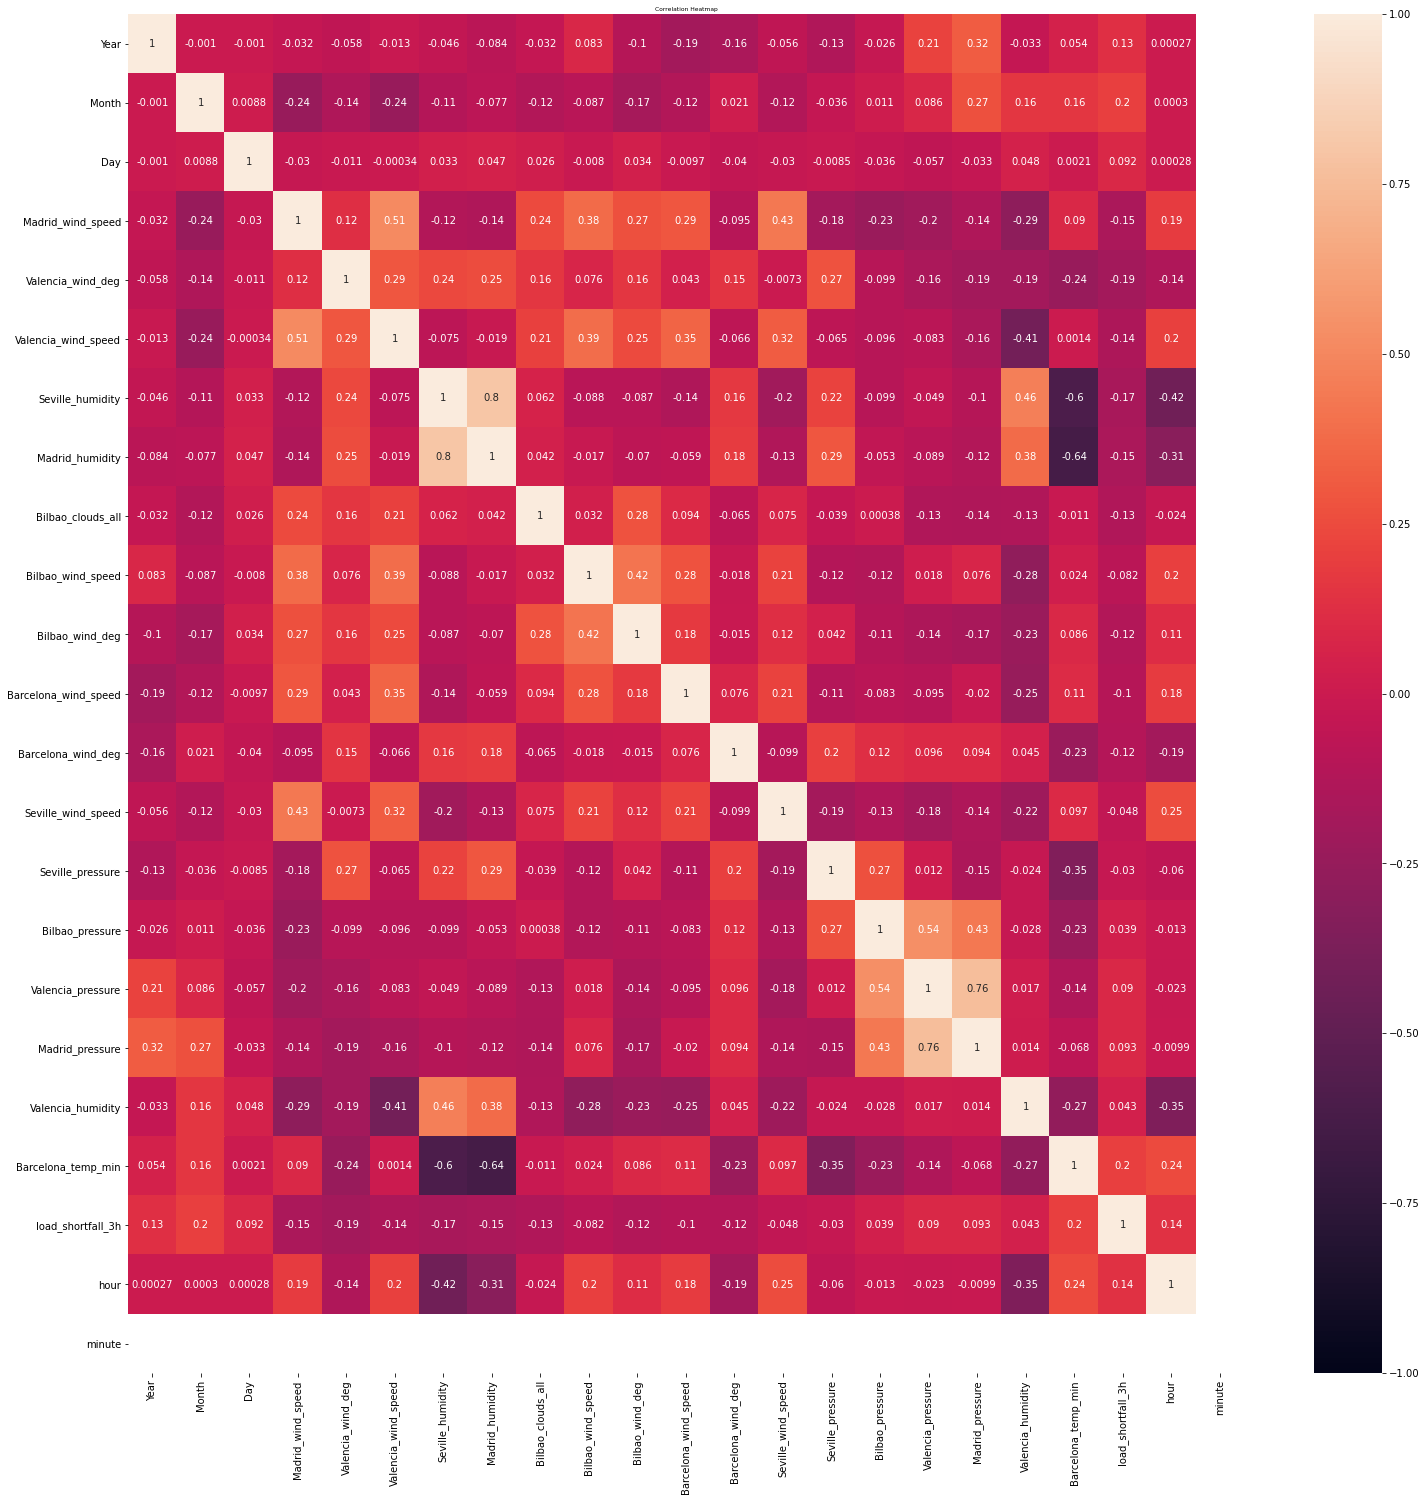

In [1858]:
# plot relevant feature interactions
##Checking for Multicollinearity
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(df_cln_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':6}, pad=3);

In [1859]:
df_cln_train = df_cln_train.drop(['Seville_wind_speed'], axis = 1)

In [1860]:
df_cln_test = df_cln_test.drop(['Seville_wind_speed'], axis = 1)

In the train dataset, we are left with 8763 rows and 21 columns which include the load_shortfall_3h target variable.

In [1861]:
df_cln_test.shape

(2920, 21)

In the test dataset, we are left with 2920 rows and 20 columns. The columns does not include the load_shortfall_3h target variable. The test dataset is going to be kept till the final phase when we need to get our final predicted results.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created regression models that are able to accurately predict the three hour load shortfall. |

---

In [1862]:
#Assigning the two dataset
y = df_cln_train[:len(df)][['load_shortfall_3h']]
x = df_cln_train[:len(df)].drop('load_shortfall_3h', axis = 1)

The train dataset was splitted to two, x and y. The x is training dataset without the load_shortfall_3h while the y is only the load_shortfall_3h column from the train dataset.

In [1863]:
from lightgbm import LGBMRegressor

We are using the Lightgbm regression model because this is a model that performs well on time data series.

In [1864]:
xgbr = xgb.XGBRegressor(verbosity=0)

xgboost is another model that performs well on time series. 

In [1865]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [1866]:
# create targets and features dataset
x_train = df_cln_train[:len(df)].drop('load_shortfall_3h', axis = 1)
x_test = df_cln_train[len(df):].drop('load_shortfall_3h', axis = 1)

In [1867]:
model_catboost = CatBoostRegressor()

In [1868]:
#parameters = {'depth' : [6,8,10],'learning_rate' : [0.01, 0.05, 0.1],'iterations' : [30, 50, 100]}

The train dataset is split into the target variable and features in order to train the dataset to be used on the test dataset later on. 

In [1869]:
#using Random Forest Regressor
regressor = RandomForestRegressor()

The random forest regression model was initialised with the n_estimator which serves as the number of trees set to 25 while the random state is fixed at 1. These hyper-parameters are tweeked from time to time in order to get better performance from our model.

In [1870]:
#loading the model the linear regression model
lr = LinearRegression()

The linear regression model is initialised so we can train our dataset with the linear regression model.

In [1871]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)

We decided to split the dataset into train and test by keeping 80% of the dataset for the train while keeping 20% for the test. The x_test in this case is the validation test.

In [1872]:
#grid = GridSearchCV(estimator=model_catboost, param_grid = parameters, cv = 2, n_jobs=-1) #catboost

In [1873]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [1874]:
model_catboost.fit(x_train, y_train)

Learning rate set to 0.055693
0:	learn: 5143.5009399	total: 10.8ms	remaining: 10.8s
1:	learn: 5066.7599836	total: 20ms	remaining: 9.98s
2:	learn: 4990.0087643	total: 29.4ms	remaining: 9.77s
3:	learn: 4907.0273883	total: 37.9ms	remaining: 9.43s
4:	learn: 4850.6390610	total: 46.7ms	remaining: 9.29s
5:	learn: 4796.3111833	total: 56ms	remaining: 9.27s
6:	learn: 4747.5238242	total: 61.8ms	remaining: 8.76s
7:	learn: 4683.2592439	total: 68.6ms	remaining: 8.51s
8:	learn: 4634.1947168	total: 75.4ms	remaining: 8.3s
9:	learn: 4579.2865797	total: 84ms	remaining: 8.31s
10:	learn: 4537.9902276	total: 90.8ms	remaining: 8.17s
11:	learn: 4490.8166276	total: 97.4ms	remaining: 8.02s
12:	learn: 4451.6736469	total: 103ms	remaining: 7.83s
13:	learn: 4421.0324295	total: 109ms	remaining: 7.67s
14:	learn: 4380.8659562	total: 115ms	remaining: 7.58s
15:	learn: 4353.4507696	total: 122ms	remaining: 7.52s
16:	learn: 4322.9171752	total: 128ms	remaining: 7.41s
17:	learn: 4298.3410421	total: 133ms	remaining: 7.25s
18:

The xgboost model was fitted to the x_train and y_train dataset. 

In [1875]:
xgb_pred = xgbr.predict(x_test)

The xgboost model is used to predict the x_test which is the validation test and not the main test.

In [1876]:
cat_pred = model_catboost.predict(x_test)

In [1877]:
model = LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor()

The LGBM model is fitted to the train dataset.

In [1878]:
pred_lgbm = model.predict(x_test)

The Lightgbm model is used to predict the x_test dataset.

In [1879]:
model_save_path = "Lightgbm_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

Pickling of the Lightgbm model was done. This model pickled is later going to be needed in building and deploying the Application programme interface(API).

In [1880]:
# evaluate one or more ML models
regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)


<ipython-input-1880-07561810fa83>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


The random forest regression model is fitted to our train dataset and also used to predict our x_test.

In [1881]:
import pickle

model_save_path = "random_forest_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(regressor,file)

Pickling of the random forest regression model was done. This model pickled is later going to be needed in building and deploying the Application programme interface(API).

In [1882]:
lr.fit(x_train, y_train)
pred_lm = lr.predict(x_test)

The linear regression model is fitted to our train dataset and also used to predict our trained data.

In [1883]:
models = [("xgb", xgbr), ("LGBM", model), ("catboost", model_catboost)]

The variable models is used to set up the three models we combined for the voting ensemble regression model. This variable is used as the estimators.

In [1884]:
# Specify weights for weighted model averaging
model_weightings = np.array([0.3, 0.3, 0.4])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

The weights of the models foe this ensemble regressor is assigned in order to help the model perform optimally. This is the idea behind the voting ensemble.

In [1885]:
v_reg.fit(x_train,y_train)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate set to 0.055693
0:	learn: 5143.5009399	total: 5.43ms	remaining: 5.42s
1:	learn: 5066.7599836	total: 10.9ms	remaining: 5.42s
2:	learn: 4990.0087643	total: 17.3ms	remaining: 5.75s
3:	learn: 4907.0273883	total: 23.8ms	remaining: 5.92s
4:	learn: 4850.6390610	total: 30.2ms	remaining: 6.02s
5:	learn: 4796.3111833	total: 35.5ms	remaining: 5.87s
6:	learn: 4747.5238242	total: 40.9ms	remaining: 5.8s
7:	learn: 4683.2592439	total: 47.5ms	remaining: 5.89s
8:	learn: 4634.1947168	total: 54ms	remaining: 5.95s
9:	learn: 4579.2865797	total: 59ms	remaining: 5.84s
10:	learn: 4537.9902276	total: 64.2ms	remaining: 5.77s
11:	learn: 4490.8166276	total: 70.2ms	remaining: 5.78s
12:	learn: 4451.6736469	total: 76.1ms	remaining: 5.78s
13:	learn: 4421.0324295	total: 81ms	remaining: 5.71s
14:	learn: 4380.8659562	total: 87.3ms	remaining: 5.73s
15:	learn: 4353.4507696	total: 95.4ms	remaining: 5.87s
16:	learn: 4322.9171752	total: 102ms	remaining: 5.91s
17:	learn: 4298.3410421	total: 108ms	remaining: 5.87s

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256,...t_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves

The voting ensemble regression model is fitted to the train data.

In [1886]:
y_pred = v_reg.predict(x_test)

The voting ensemble regression model is the used to predict the train dataset.

In [1887]:
import pickle

model_save_path = "voting_regression_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(v_reg,file)

Pickling of the voting ensemble regression model was done. This model pickled is later going to be needed in building and deploying the Application programme interface(API).

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
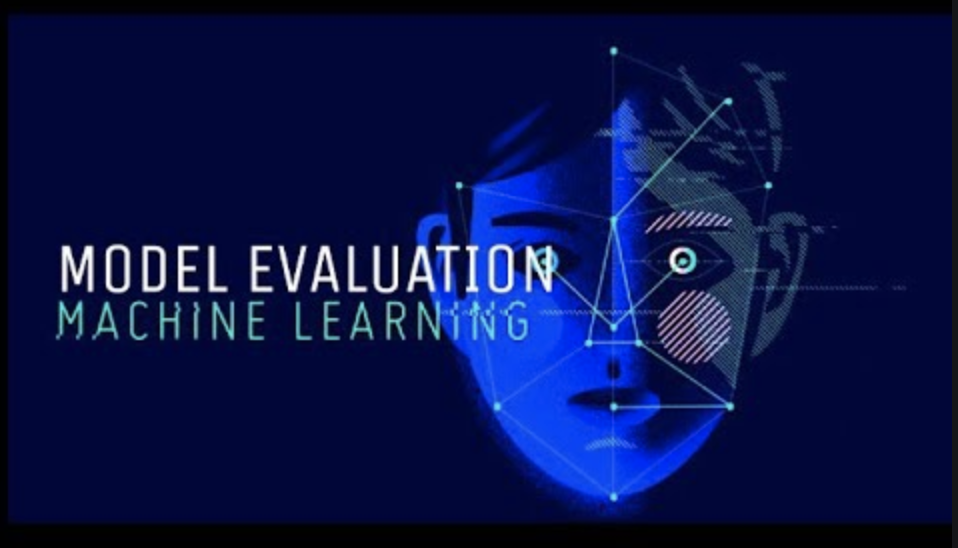
---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section the relative performance of the various trained ML models on a holdout dataset was carried out. 
---

In [1888]:
# Compare model performance
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

Function for checking the models performance was developed

In [1889]:
rmse(y_test, cat_pred)

2804.140363834695

In [1890]:
rmse(y_test, xgb_pred)

2890.473179175763

The root mean square error of the xgboost model was checked and it returned a rmse score of approximately 3492.

In [1891]:
rmse(y_test, pred_lgbm)

2955.1795414583635

The root mean square error of the lgbm model was checked and it returned a rmse score of approximately 3529.

In [1892]:
rmse(y_test, y_pred)    #Ensemble

2779.0203338031947

The root mean square error of the voting ensemble regression model was checked and it returned a rmse score of approximately 3386.

In [1893]:
rmse(y_test, pred)

3028.6552625315117

The root mean square error of the random forest regression model was checked and it returned a rmse score of approximately 3497.

In [1894]:
rmse(y_test, pred_lm)

4761.6200290427

The root mean square error of the linear regression model was checked and it returned a rmse score of approximately 3386.

In [1895]:
r2_score(y_test, y_pred)  #ensemble

0.7109818834980466

The r2 accuracy score of the voting regression model was checked and it returned a score of approximately 57%.

In [1896]:
r2_score(y_test, pred)

0.6567256903392469

The r2 accuracy score of the randon forest regression model was checked and it returned a score of approximately 54%.

In [1897]:
r2_score(y_test, pred_lm)

0.15150147798676084

The r2 accuracy score of the voting regression model was checked and it returned a score of approximately 15%.

In [1898]:
x_train = df_cln_train[:len(df)].drop('load_shortfall_3h', axis = 1)
x_test = df_cln_train[len(df):].drop('load_shortfall_3h', axis = 1)

In [1899]:
model_catboost.fit(x_train, y)
pred = model_catboost.predict(df_cln_test)


Learning rate set to 0.057692
0:	learn: 5119.7355602	total: 13ms	remaining: 13s
1:	learn: 5039.7920886	total: 29.4ms	remaining: 14.7s
2:	learn: 4957.2620509	total: 38.5ms	remaining: 12.8s
3:	learn: 4871.4766273	total: 48.3ms	remaining: 12s
4:	learn: 4818.9716578	total: 58.8ms	remaining: 11.7s
5:	learn: 4756.6513630	total: 71.4ms	remaining: 11.8s
6:	learn: 4706.8846810	total: 90.6ms	remaining: 12.8s
7:	learn: 4649.2551178	total: 103ms	remaining: 12.8s
8:	learn: 4597.8754012	total: 113ms	remaining: 12.4s
9:	learn: 4555.1862187	total: 122ms	remaining: 12.1s
10:	learn: 4511.1635605	total: 133ms	remaining: 11.9s
11:	learn: 4467.8727507	total: 139ms	remaining: 11.4s
12:	learn: 4426.6488509	total: 151ms	remaining: 11.4s
13:	learn: 4393.4939628	total: 158ms	remaining: 11.2s
14:	learn: 4356.7991890	total: 170ms	remaining: 11.2s
15:	learn: 4316.5758785	total: 184ms	remaining: 11.3s
16:	learn: 4293.7045563	total: 202ms	remaining: 11.7s
17:	learn: 4265.9135648	total: 219ms	remaining: 11.9s
18:	lea

Now, the random forest model  is fitted to the train data and it is predicted on the unseen data that was kept after the Data Engineering phase.

In [1900]:
v_reg.fit(x_train, y)
y_pred = v_reg.predict(df_cln_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate set to 0.057692
0:	learn: 5119.7355602	total: 8.22ms	remaining: 8.21s
1:	learn: 5039.7920886	total: 15.6ms	remaining: 7.8s
2:	learn: 4957.2620509	total: 23.5ms	remaining: 7.82s
3:	learn: 4871.4766273	total: 31.7ms	remaining: 7.88s
4:	learn: 4818.9716578	total: 38.6ms	remaining: 7.69s
5:	learn: 4756.6513630	total: 45.7ms	remaining: 7.57s
6:	learn: 4706.8846810	total: 52.8ms	remaining: 7.49s
7:	learn: 4649.2551178	total: 59.4ms	remaining: 7.36s
8:	learn: 4597.8754012	total: 64.5ms	remaining: 7.1s
9:	learn: 4555.1862187	total: 70.9ms	remaining: 7.02s
10:	learn: 4511.1635605	total: 77ms	remaining: 6.92s
11:	learn: 4467.8727507	total: 83ms	remaining: 6.84s
12:	learn: 4426.6488509	total: 88.1ms	remaining: 6.69s
13:	learn: 4393.4939628	total: 94.3ms	remaining: 6.64s
14:	learn: 4356.7991890	total: 101ms	remaining: 6.63s
15:	learn: 4316.5758785	total: 107ms	remaining: 6.57s
16:	learn: 4293.7045563	total: 112ms	remaining: 6.47s
17:	learn: 4265.9135648	total: 118ms	remaining: 6.45s


Now, the voting ensemble regression model is fitted to the train data and it is predicted on the unseen data that was kept after the Data Engineering phase.

In [1901]:
result_vreg = pd.DataFrame(y_pred, columns= ['load_shortfall_3h'])
result_vreg.head()


,load_shortfall_3h
0,14171.936421
1,8349.749525
2,7275.860663
3,10299.376159
4,14725.070252


Above is the output of the prediction that was made by the voting ensemble regression model.

In [1902]:
result = pd.DataFrame(pred, columns= ['load_shortfall_3h'])
result.head()

,load_shortfall_3h
0,12943.365142
1,6861.638812
2,5892.868030
3,9375.984458
4,13236.511712


Above is the output of the prediction that was made by the random forest regression model.

In [1903]:
output = pd.DataFrame({"time":df2['time']})
vreg_submission = output.join(result_vreg)
vreg_submission.to_csv("vreg_submission.csv", index = False)

A submission file is created for the result of the voting ensemble model prediction.

In [1904]:
output = pd.DataFrame({"time":df2['time']})
submission = output.join(result)
submission.to_csv("submission.csv", index = False)

A submission file is created for the result of the random forest model prediction.

In [1905]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,12943.365142
1,2018-01-01 03:00:00,6861.638812
2,2018-01-01 06:00:00,5892.868030
3,2018-01-01 09:00:00,9375.984458
4,2018-01-01 12:00:00,13236.511712
...,...,...
2915,2018-12-31 09:00:00,8529.153077
2916,2018-12-31 12:00:00,11564.649922
2917,2018-12-31 15:00:00,11695.781356
2918,2018-12-31 18:00:00,12186.392376


Final result for the random forest regression model. 

In [1906]:
vreg_submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,14171.936421
1,2018-01-01 03:00:00,8349.749525
2,2018-01-01 06:00:00,7275.860663
3,2018-01-01 09:00:00,10299.376159
4,2018-01-01 12:00:00,14725.070252
...,...,...
2915,2018-12-31 09:00:00,9176.388960
2916,2018-12-31 12:00:00,12950.555923
2917,2018-12-31 15:00:00,11810.960210
2918,2018-12-31 18:00:00,11624.575111


Final result for the voting ensemble regression model. 

The voting ensemble regression model is the best model for this task because it returned the lowest RMSE and the highest r2 accuracy score.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
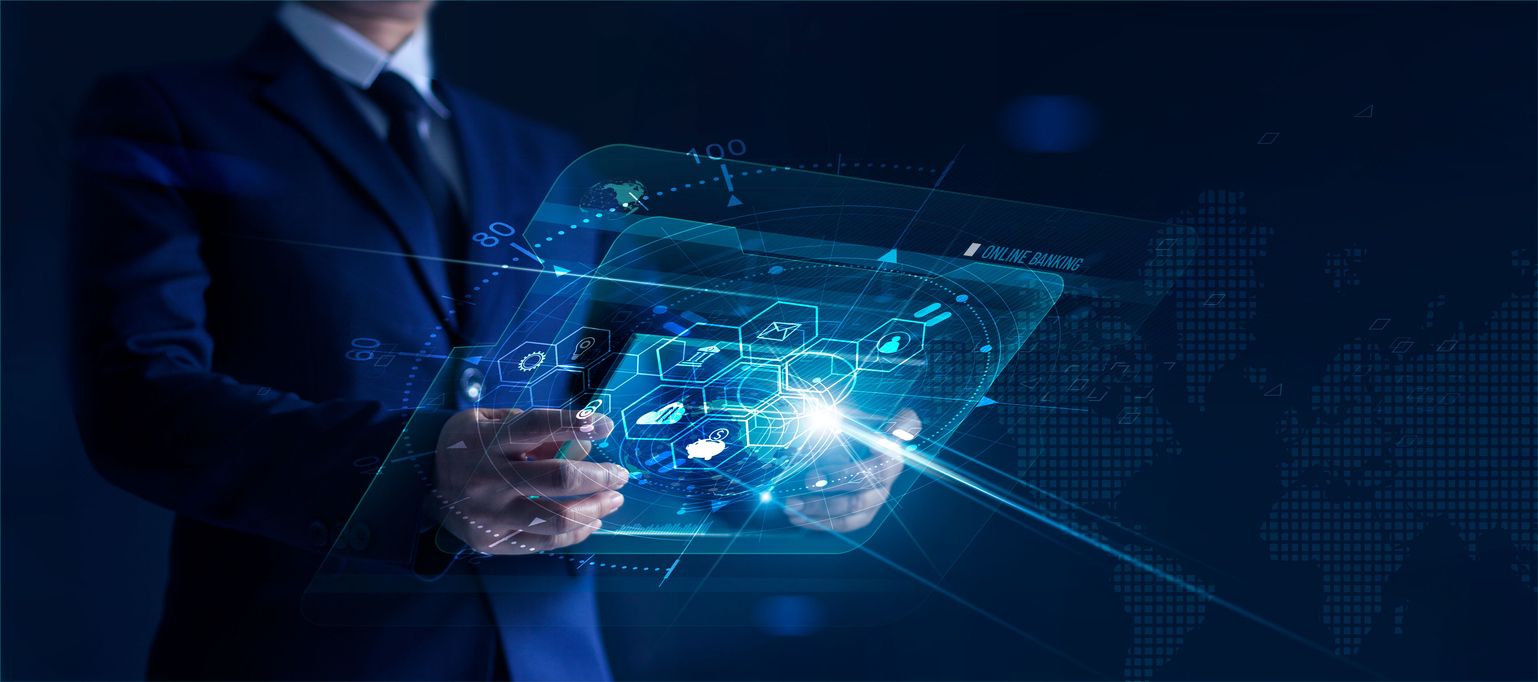
---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Discussing the logic for picking the chosen model

The following factors were considered when choosing the best model;

Presence or Absence of Linearity: From our dataset, we observed that the features were not linearly correlated with the target variable which makes it easy for us to dump the linear regression model even before seeing the  high rmse.

Consideration for Outliers: We chose the models based on how well they performed even in the presence of outliers.


Concerns of overfitting: We ensured we chose model that does not bring about overfitting. 


Root Mean Square Error upon prediction: The root mean square error was observed carefully and the model with the lowest rmse was selected as the best model.
